**Tugas 3**

Nama : Siskanti

NIM : H071201064

Prodi : Sistem Informasi

## **Dataset Numerik**

In [40]:
# import the library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

**Dataset : Forest Fires Data Set**

**Source:**

Paulo Cortez, pcortez '@' dsi.uminho.pt, Department of Information Systems, University of Minho, Portugal. Aníbal Morais, araimorais '@' gmail.com, Department of Information Systems, University of Minho, Portugal



**Data Set Information:**

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function. Then, several Data Mining methods were applied. After fitting the models, the outputs were post-processed with the inverse of the ln(x+1) transform. Four different input setups were used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value: 12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The best RMSE was attained by the naive mean predictor. An analysis to the regression error curve (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect, the SVM model predicts better small fires, which are the majority.

**Attribute Information:**

For more information, read [Cortez and Morais, 2007].

X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
month - month of the year: 'jan' to 'dec'
day - day of the week: 'mon' to 'sun'
FFMC - FFMC index from the FWI system: 18.7 to 96.20
DMC - DMC index from the FWI system: 1.1 to 291.3
DC - DC index from the FWI system: 7.9 to 860.6
ISI - ISI index from the FWI system: 0.0 to 56.10
temp - temperature in Celsius degrees: 2.2 to 33.30
RH - relative humidity in %: 15.0 to 100
wind - wind speed in km/h: 0.40 to 9.40
rain - outside rain in mm/m2 : 0.0 to 6.4
area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

## **Data Exploration**

membaca data 

In [55]:
data = pd.read_csv("/content/forestfires.csv")

menampilkan data masih secara kasar





In [56]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


melihat atribut-atribut apa saja ada dengan  menggunakan data frame coloumns yaitu fungsi dari pandas

In [57]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

melihat data dengan menampilkan 20 baris, ketika kita hanya ingin melihat beberapa baris, karena kalau tidak menggunakan head itu barisnya akan terpotong dan akan melanjutkan ke baris paling bawah

In [58]:
data.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


kita akan melihat apa-apa saja nilai yang unik. biasanya data yang unik itu lebih baik dilihat pada data yang kategorik. dan apabila data nya kontinu maka tidak harus dilihat keunikannya

In [59]:
data.value_counts()

X  Y  month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area 
3  4  aug    sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00     2
4  4  mar    sat  91.7  35.8   80.8   7.8   17.0  27  4.9   0.0   28.66    2
   3  aug    wed  92.1  111.2  654.1  9.6   20.4  42  4.9   0.0   0.00     2
3  6  jun    fri  91.1  94.1   232.1  7.1   19.2  38  4.5   0.0   0.00     2
      sep    sun  92.4  124.1  680.7  8.5   17.2  58  1.3   0.0   0.00     1
                                                                          ..
6  5  jun    sat  53.4  71.0   233.8  0.4   10.6  90  2.7   0.0   0.00     1
      mar    fri  91.2  48.3   97.8   12.5  11.7  33  4.0   0.0   8.31     1
                                            14.6  26  9.4   0.0   2.53     1
             mon  87.2  15.1   36.9   7.1   10.2  45  5.8   0.0   3.18     1
1  2  aug    fri  90.1  108.0  529.8  12.5  14.7  66  2.7   0.0   0.00     1
Length: 513, dtype: int64

mencari beberapa atribut

In [60]:
column_names = data.columns
column_names_class = column_names[4:]
column_names_class

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

In [61]:
for i in column_names_class:
  print(data[i].value_counts())

91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
50.4     1
82.1     1
86.3     1
85.1     1
87.1     1
Name: FFMC, Length: 106, dtype: int64
99.0     10
129.5     9
142.4     8
231.1     8
137.0     7
         ..
4.6       1
24.9      1
133.6     1
96.3      1
3.2       1
Name: DMC, Length: 215, dtype: int64
745.3    10
692.6     9
698.6     8
601.4     8
692.3     8
         ..
730.6     1
431.6     1
74.3      1
313.4     1
537.4     1
Name: DC, Length: 219, dtype: int64
9.6     23
7.1     21
6.3     20
7.0     17
8.4     17
        ..
7.3      1
12.1     1
14.6     1
56.1     1
22.7     1
Name: ISI, Length: 119, dtype: int64
17.4    8
19.6    8
15.4    7
20.6    7
23.4    6
       ..
29.6    1
8.7     1
25.7    1
31.0    1
4.8     1
Name: temp, Length: 192, dtype: int64
27     33
39     24
35     20
43     17
42     17
       ..
84      1
80      1
76      1
69      1
100     1
Name: RH, Length: 75, dtype: int64
2.2    53
3.1    53
4.0    51
4.9    48
2.7    44
4.5

digunakan untuk ngeplot

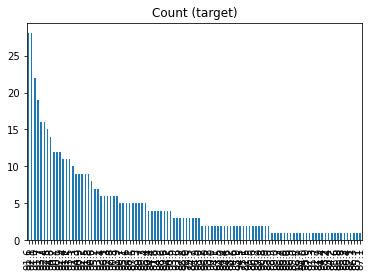

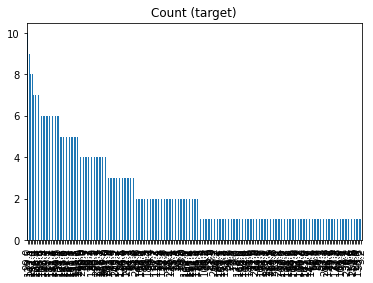

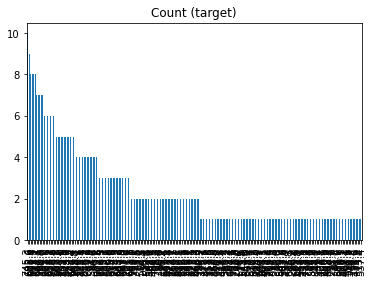

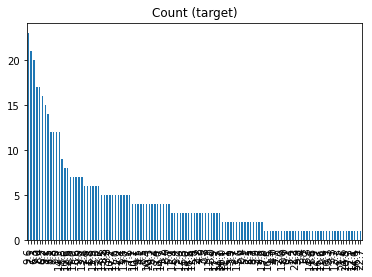

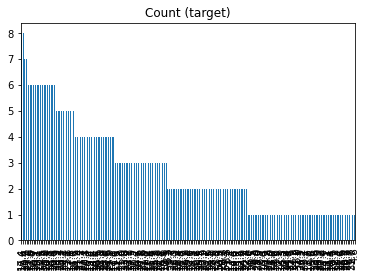

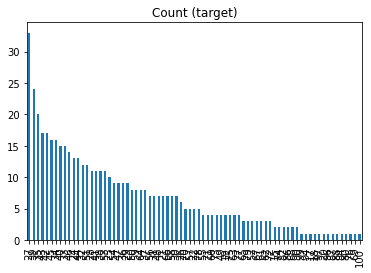

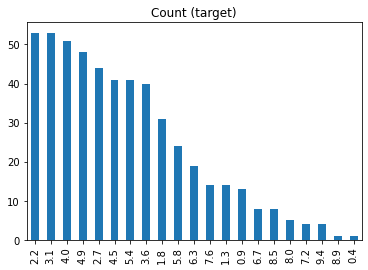

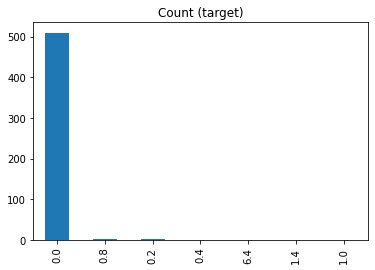

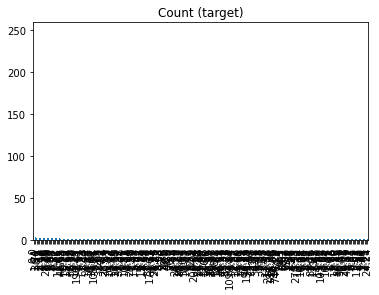

In [62]:
for i in column_names_class:
  data[i].value_counts().plot(kind='bar', title='Count (target)')
  plt.show()

melihat informasi statistik dasar dari data dengan menggunakan method describe dari pandas untuk melihat misalnya Q1, Q2, atau Q3. kita bisa melihat nilai minimum dan maksimumnya serta standar devisiasinya.

In [63]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


untuk melihat tipe datanya

In [39]:
for i in column_names:
  print(f"{i} bertipe data {data[i].dtypes}")

X bertipe data int64
Y bertipe data int64
month bertipe data object
day bertipe data object
FFMC bertipe data float64
DMC bertipe data float64
DC bertipe data float64
ISI bertipe data float64
temp bertipe data float64
RH bertipe data int64
wind bertipe data float64
rain bertipe data float64
area bertipe data float64


berikut ini ada beberapa atribut. disini kita bisa ambil sembarang atribut.

## **Handle Missing Value**

Untuk melihat apakah ada nilai null pada dataset dengan menggunakan method "isnull"

In [ ]:
data["month"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Name: month, Length: 517, dtype: bool

pada sum itu digunakan untuk menjumlahkan berapa missing value yang ada pada setiap variabel, atribut atau kolom

In [ ]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Berhubung dataset saya tidak memiliki missing value jadi untuk tahap selanjutnya saya tidak jalankan melainkan saya hanya akan menampilkan kode yang digunakan untuk menangani missing value

In [ ]:
data.shape

(517, 13)

berikut kode yang digunakan untuk menangani apabila terdapat missing value pada dataset anda

In [ ]:
# df_remove_byindex = df.dropna(axis = 1, how ='all', inplace = True)#---> drop missing value
# Determine if rows or columns which contain missing values are removed.

#     0, or ‘index’ : Drop rows which contain missing values.

#     1, or ‘columns’ : Drop columns which contain missing value.
# print(df_remove_byindex)

digunakan ketika ingin langsung menghapus

In [ ]:
# df_remove_byindex.isnull().sum

mengisi dengan mean dan median

In [ ]:
#data = data.fillna(data.mean()) #fill missing value using mean
#data = data.fillna(data.median()) #fill missing value using median
#data.isnull().sum()

In [ ]:
data["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

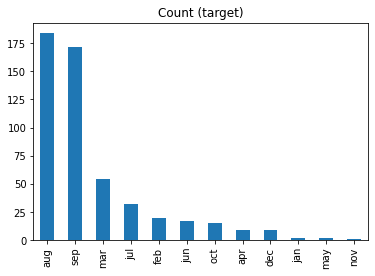

In [ ]:
data["month"].value_counts().plot(kind='bar', title='Count (target)')

## **Categorical encoding using Label-Encoding and One-Hot-Encoder**

Mengubah data kategorik ke numerik ada dua cara yaitu sebagai beriku:

1. One Hot Encoding

  One-Hot encoding adalah salah satu metode encoding. Metode ini merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai integer, 0 dan 1, dimana semua elemen akan bernilai 0 kecuali satu elemen yang bernilai 1, yaitu elemen yang memiliki nilai kategori tersebut

In [ ]:
one_hot_encoded = pd.get_dummies(data, columns = ["month"])
print(one_hot_encoded)

     X  Y  day  FFMC  ...  month_may  month_nov  month_oct  month_sep
0    7  5  fri  86.2  ...          0          0          0          0
1    7  4  tue  90.6  ...          0          0          1          0
2    7  4  sat  90.6  ...          0          0          1          0
3    8  6  fri  91.7  ...          0          0          0          0
4    8  6  sun  89.3  ...          0          0          0          0
..  .. ..  ...   ...  ...        ...        ...        ...        ...
512  4  3  sun  81.6  ...          0          0          0          0
513  2  4  sun  81.6  ...          0          0          0          0
514  7  4  sun  81.6  ...          0          0          0          0
515  1  4  sat  94.4  ...          0          0          0          0
516  6  3  tue  79.5  ...          0          1          0          0

[517 rows x 24 columns]


In [ ]:
one_hot_encoded = pd.get_dummies(data, columns = ["day"])
print(one_hot_encoded)

     X  Y month  FFMC    DMC  ...  day_sat  day_sun  day_thu  day_tue  day_wed
0    7  5   mar  86.2   26.2  ...        0        0        0        0        0
1    7  4   oct  90.6   35.4  ...        0        0        0        1        0
2    7  4   oct  90.6   43.7  ...        1        0        0        0        0
3    8  6   mar  91.7   33.3  ...        0        0        0        0        0
4    8  6   mar  89.3   51.3  ...        0        1        0        0        0
..  .. ..   ...   ...    ...  ...      ...      ...      ...      ...      ...
512  4  3   aug  81.6   56.7  ...        0        1        0        0        0
513  2  4   aug  81.6   56.7  ...        0        1        0        0        0
514  7  4   aug  81.6   56.7  ...        0        1        0        0        0
515  1  4   aug  94.4  146.0  ...        1        0        0        0        0
516  6  3   nov  79.5    3.0  ...        0        0        0        1        0

[517 rows x 19 columns]


2. Label Encoding

  Label encoding yaitu mengubah setiap nilai dalam kolom menjadi angka yang berurutan

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

ingin merubah nilai kategorik dari kolom "month" ke numerik

In [ ]:
data['month'] = encoder.fit_transform(data['month'])
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


ingin merubah nilai kategorik dari kolom "day" ke numerik

In [ ]:
data['day'] = encoder.fit_transform(data['day'])
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## **Normalization**

Normalisasi adalah proses pengelompokan atribut data yang membentuk entitas sederhana, nonredundan, fleksibel, dan mudah beradaptasi, Sehingga dapat dipastikan bahwa database yang dibuat berkualitas baik.

Tujaun dari normalisasi itu dugunakan untuk menghilangkan dan mengurangi adanya redudansi data dan untuk memastikan dependensi data.

Biasanya dalam preprocessing, proses normalisasi itu digunakan untuk memodifikasi nilai dalam varabel sehingga kita dapat mengukurnya dalam skala umum. Beberapa bentuk normalisasi yang paling umum bertujuan untuk mengubah nilai-nilai sehingga jumlahnya menjadi 1

1. Z-score

Z-score digunakan untuk mengambil sampel dalam satu set data atau untuk menentukan berapa jumlah standar deviasi di atas atau di bawah mean.

In [ ]:

from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
data_std = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)

data_std

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.008313,-0.244001,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.008313,-0.244001,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,1.440925,1.383722,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,1.440925,1.383722,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,-1.154748,-0.244001,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,1.008313,-0.244001,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,-1.587360,-0.244001,-1.089076,-0.383187,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


1. Min-Max Scaler

dapat dilihat bahwa range, nilai maksimum dan minimum data-data numerik diatas terlampau jauh. Sehingga  dilakukan penskalaan agar hasil yang  didapat dalam proses Machine Learning lebih akurat dan fleksibel.

In [ ]:
print('Min : ', data.min(axis=0))
print('Max : ', data.max(axis=0))

Min :  X         1.0
Y         2.0
month     0.0
day       0.0
FFMC     18.7
DMC       1.1
DC        7.9
ISI       0.0
temp      2.2
RH       15.0
wind      0.4
rain      0.0
area      0.0
dtype: float64
Max :  X           9.00
Y           9.00
month      11.00
day         6.00
FFMC       96.20
DMC       291.30
DC        860.60
ISI        56.10
temp       33.30
RH        100.00
wind        9.40
rain        6.40
area     1090.84
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
data = pd.DataFrame(data=data_scaled, columns= column_names)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.750,0.285714,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.750,0.285714,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.875,0.571429,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.875,0.571429,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.750,0.428571,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,0.750,0.285714,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,0.750,0.285714,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,0.875,0.571429,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,0.875,0.571429,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.375,0.142857,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000
513,0.125,0.285714,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000
514,0.750,0.285714,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000
515,0.000,0.285714,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000


In [ ]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.005904
513    0.049769
514    0.010231
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [ ]:
column_names = list(X.columns)

In [ ]:
data.describe

<bound method NDFrame.describe of          X         Y     month       day  ...        RH      wind     rain      area
0    0.750  0.428571  0.636364  0.000000  ...  0.423529  0.700000  0.00000  0.000000
1    0.750  0.285714  0.909091  0.833333  ...  0.211765  0.055556  0.00000  0.000000
2    0.750  0.285714  0.909091  0.333333  ...  0.211765  0.100000  0.00000  0.000000
3    0.875  0.571429  0.636364  0.000000  ...  0.964706  0.400000  0.03125  0.000000
4    0.875  0.571429  0.636364  0.500000  ...  0.988235  0.155556  0.00000  0.000000
..     ...       ...       ...       ...  ...       ...       ...      ...       ...
512  0.375  0.142857  0.090909  0.500000  ...  0.200000  0.255556  0.00000  0.005904
513  0.125  0.285714  0.090909  0.500000  ...  0.658824  0.600000  0.00000  0.049769
514  0.750  0.285714  0.090909  0.500000  ...  0.647059  0.700000  0.00000  0.010231
515  0.000  0.285714  0.090909  0.333333  ...  0.317647  0.400000  0.00000  0.000000
516  0.625  0.142857  0.818182 

In [ ]:
print('Min : ', data.min(axis=0))
print('Max : ', data.max(axis=0))


Min :  X           1
Y           2
month     apr
day       fri
FFMC     18.7
DMC       1.1
DC        7.9
ISI         0
temp      2.2
RH         15
wind      0.4
rain        0
area        0
dtype: object
Max :  X              9
Y              9
month        sep
day          wed
FFMC        96.2
DMC        291.3
DC         860.6
ISI         56.1
temp        33.3
RH           100
wind         9.4
rain         6.4
area     1090.84
dtype: object


## **How to Detect, Handle and Visualize Outliers**

kita akan handle outlier atau data pencilan. kita akan mencari interquartil range, kita akan kurangi data yang tidak masuk di maksimum dan minimun. 

Outlier adalah kasus atau data yang memiliki karakteristi unik yang terlihat sangat berbeda jauh dari observasi-observasi lainnya dan muncul dalam bentuk nilai

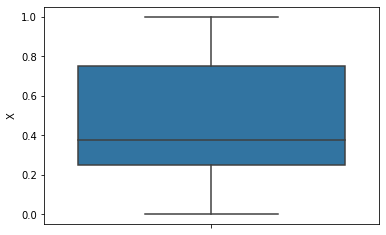

In [ ]:
import seaborn as sns
sns.boxplot(y=data['X'])

In [ ]:
data = pd.concat([data, data], axis = 1)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,0.750,0.428571,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.750,0.285714,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.750,0.285714,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.750,0.285714,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.750,0.285714,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.875,0.571429,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,0.875,0.571429,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.875,0.571429,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.875,0.571429,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


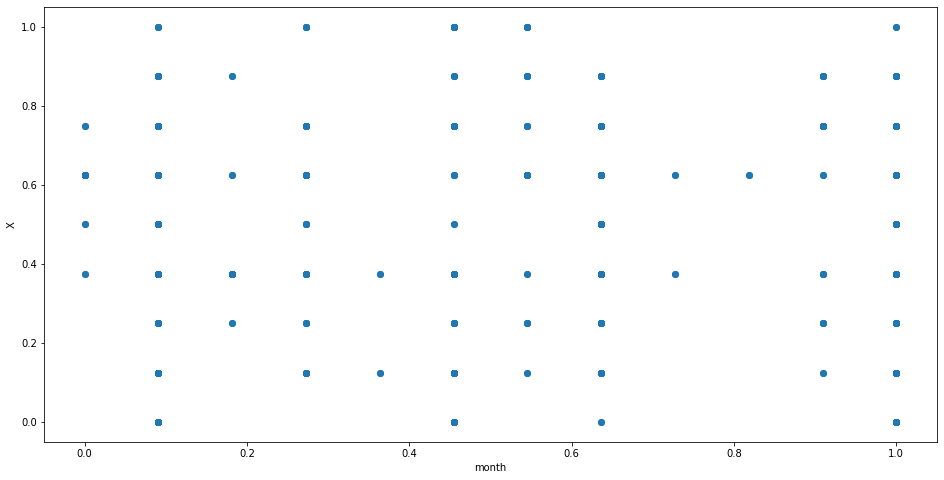

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['month'], data['X'])
ax.set_xlabel('month')
ax.set_ylabel('X')
plt.show()

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = data.drop("month",1)
columns_name = list(x.columns)

for i in column_names:
  data.boxplot(by ='month', column =[i], grid = False)

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)
#it is difficult to say which data point is an outlier

#defining threshold
threshold = 3
print(np.where(z > 3))
print(z)

[[1.00831277 0.56986043 0.28422225 ... 1.49861442 0.07326831 0.20201979]
 [1.00831277 0.24400101 0.97087134 ... 1.74175564 0.07326831 0.20201979]
 [1.00831277 0.24400101 0.97087134 ... 1.51828184 0.07326831 0.20201979]
 ...
 [1.00831277 0.24400101 1.08907592 ... 1.49861442 0.07326831 0.02653216]
 [1.58736044 0.24400101 1.08907592 ... 0.00983371 0.07326831 0.20201979]
 [0.57570057 1.05786246 0.74198831 ... 0.26950853 0.07326831 0.20201979]]
(array([  3,   3,   4,   4,  12,  12,  22,  22,  75,  75,  76,  76,  97,
        97, 130, 130, 138, 138, 151, 151, 168, 168, 199, 199, 211, 211,
       237, 237, 238, 238, 243, 243, 266, 266, 299, 299, 304, 304, 312,
       312, 379, 379, 379, 379, 402, 402, 411, 411, 415, 415, 420, 420,
       469, 469, 475, 475, 479, 479, 480, 480, 499, 499, 509, 509]), array([ 9, 22,  9, 22,  4, 17,  7, 20,  1, 14,  1, 14,  4, 17,  4, 17,  1,
       14,  1, 14, 10, 23,  4, 17,  9, 22, 12, 25, 12, 25, 11, 24,  7, 20,
        4, 17,  9, 22,  4, 17,  4,  9, 17, 22,  

In [ ]:
data.shape

(517, 26)

In [ ]:
#Using Z-Score

dataset_cleared_zscore = data[(z < 3).all(axis=1)]
dataset_cleared_zscore
dataset_cleared_zscore.shape #it will remove some rows

(486, 26)

Disini kita akan melihat quartil dari data tersebut

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X        0.500000
Y        0.142857
month    0.909091
day      0.500000
FFMC     0.034839
DMC      0.254307
DC       0.323912
ISI      0.076649
temp     0.234727
RH       0.235294
wind     0.244444
rain     0.000000
area     0.006023
X        0.500000
Y        0.142857
month    0.909091
day      0.500000
FFMC     0.034839
DMC      0.254307
DC       0.323912
ISI      0.076649
temp     0.234727
RH       0.235294
wind     0.244444
rain     0.000000
area     0.006023
dtype: float64


In [ ]:
print(data.shape)

(517, 26)


In [ ]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(316, 26)


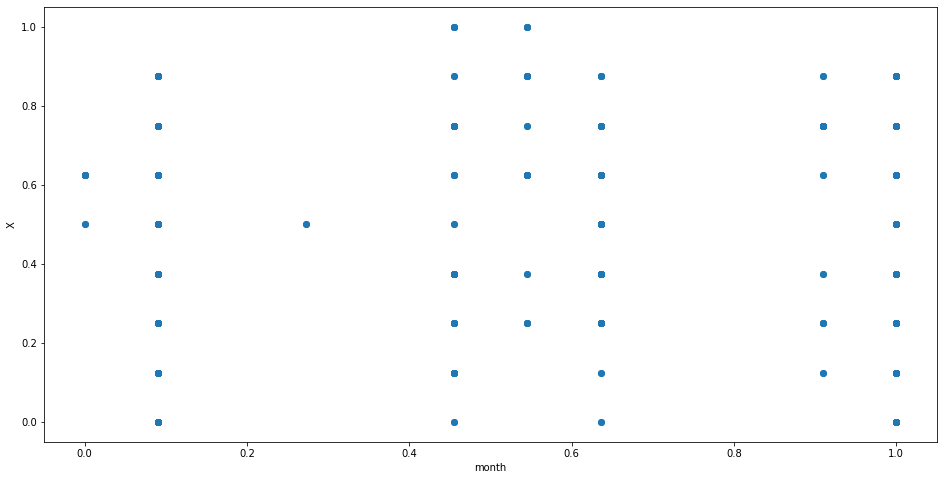

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_out['month'], data_out['X'])
ax.set_xlabel('month')
ax.set_ylabel('X')
plt.show()

In [ ]:
data


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,0.750,0.428571,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.750,0.285714,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.750,0.285714,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.750,0.285714,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.750,0.285714,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.875,0.571429,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,0.875,0.571429,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.875,0.571429,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.875,0.571429,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.375,0.142857,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.375,0.142857,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.125,0.285714,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.125,0.285714,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.750,0.285714,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.750,0.285714,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.000,0.285714,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.000,0.285714,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = data_out.drop("month",1)
y_fix = data_out["month"]
columns_name = list(X_fix.columns)

for i in column_name:
  data_out.boxplot(by ='month', column =[i], grid = False)

## **Resampling**

Resampling adalah suatu metode yang memungkinkan kita melakukan sampling dari data sample, sehingga seolah-olah data hasil penelitian tersebut merupakan populasi

Akan di akurasikan data-data tersebut

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_out.iloc[:,:-1]
y = data_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
df["month"].unique()

digunakan untuk menampilkan ukuran matriks

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['nov', 'jan']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [52]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
print(Counter(y))

1. Random Over Sampling

Contoh duplikat oversampling acak dari kelas minoritas dalam set data pelatihan dan dapat mengakibatkan overfitting untuk beberapa model

In [ ]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

2. Smote

Metode SMOTE bekerja dengan cara membuat sejumlah instance buatan pada daerah antara sebuah instance dalam kelas minoritas dengan instance minoritas tetangga terdekatnya. Dalam penerapannya SMOTE dapat mengakibatkan blind oversampling sehingga membuat batas antar kelas menjadi tidak jelas.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(Counter(y_sm))

2. SMOTE Tomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

print(Counter(y_smt))

3. Random Under Sampling

Undersampling acak menghapus contoh dari kelas mayoritas dan dapat mengakibatkan hilangnya informasi yang sangat berharga bagi model.

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

4. Tomek Links

Cara kerja Tomek Link adalah dengan menghapus data minor ataupun mayor yang memiliki kesamaan
karakteristik. Untuk setiap data, jika satu tetangga yang paling dekat memiliki kelas label yang berbeda dengan
data tersebut maka kedua data akan dihapus karena dianggap sebagai noise atau misclassify. 

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print(Counter(y_tl))

5. Cluster Centroids


In [ ]:

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

In [ ]:

# # instantiating over and under sampler
# over = RandomOverSampler(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.8)

# # first performing oversampling to minority class
# X_over, y_over = over.fit_resample(X, y)
# print(f"Oversampled: {Counter(y_over)}")

# # now to comine under sampling 
# X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
# print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_sm
y = y_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Memantine', 'Saline']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## **Data Categorical, Integer**

In [1]:
# import the library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

**Dataset : Adult Data Set**

**Source:**

Donor:

Ronny Kohavi and Barry Becker Data Mining and Visualization Silicon Graphics. e-mail: ronnyk '@' live.com for questions.

**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information: bold text Listing of attributes:

50K, <=50K.

age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## **Data Exploration**

In [75]:
df = pd.read_csv("/content/adult.data")

In [76]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [77]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [78]:
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:
df.value_counts()

39   State-gov          77516   Bachelors      13   Never-married        Adm-clerical      Not-in-family   White   Male     2174   0   40   United-States   <=50K
25   Private           195994   1st-4th       2     Never-married        Priv-house-serv   Not-in-family   White   Female  0      0   40    Guatemala       <=50K    3
19   Private           97261    HS-grad       9     Never-married        Farming-fishing   Not-in-family   White   Male    0      0   40    United-States   <=50K    2
42   Private           204235   Some-college  10    Married-civ-spouse   Prof-specialty    Husband         White   Male    0      0   40    United-States   >50K     2
49   Self-emp-not-inc  43479    Some-college  10    Married-civ-spouse   Craft-repair      Husband         White   Male    0      0   40    United-States   <=50K    2
19   Private           146679   Some-college  10    Never-married        Exec-managerial   Own-child       Black   Male    0      0   30    United-States   <=50K    2
   

In [81]:
column_names = df.columns
column_names_class = column_names[78:]
column_names_class

Index([], dtype='object')

In [82]:
for i in column_names_class:
  print(df[i].value_counts())

In [83]:
for i in column_names_class:
  df[i].value_counts().plot(kind='bar', title='Count (target)')
  plt.show()

In [10]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [85]:
for i in column_names:
  print(f"{i} bertipe data {df[i].dtypes}")

39 bertipe data int64
 State-gov bertipe data object
 77516 bertipe data int64
 Bachelors bertipe data object
 13 bertipe data int64
 Never-married bertipe data object
 Adm-clerical bertipe data object
 Not-in-family bertipe data object
 White bertipe data object
 Male bertipe data object
 2174 bertipe data int64
 0 bertipe data int64
 40 bertipe data int64
 United-States bertipe data object
 <=50K bertipe data object


## **Handle Missing Value**

In [12]:
df["39"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: 39, Length: 32560, dtype: bool

In [13]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [14]:
df.shape

(32560, 15)

In [ ]:
# df_remove_byindex = df.dropna(axis = 1, how ='all', inplace = True)#---> drop missing value
# Determine if rows or columns which contain missing values are removed.

#     0, or ‘index’ : Drop rows which contain missing values.

#     1, or ‘columns’ : Drop columns which contain missing value.
# print(df_remove_byindex)

In [ ]:
# df_remove_byindex.isnull().sum

In [ ]:
#df = df.fillna(df.mean()) #fill missing value using mean
# df = df.fillna(df.median()) #fill missing value using median
#df.isnull().sum()

In [15]:
df["39"].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: 39, Length: 73, dtype: int64

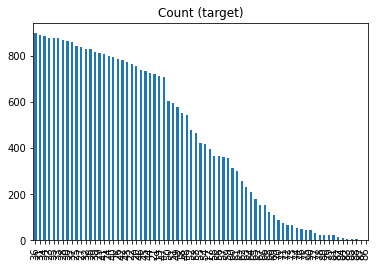

In [16]:
df["39"].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
#category = pd.get_dummies(df.Treatment)
#df_baru = pd.concat([df, category], axis=1)
#df_baru = df_baru.drop(columns='Treatment')
#df_baru

## **Categorical encoding using Label-Encoding and One-Hot-Encoder**

1. One Hot Encoding

In [17]:
one_hot_encoded_data = pd.get_dummies(df, columns = ["39"])
print(one_hot_encoded_data)

               State-gov   77516    Bachelors   13  ... 39_86 39_87 39_88 39_90
0       Self-emp-not-inc   83311    Bachelors   13  ...     0     0     0     0
1                Private  215646      HS-grad    9  ...     0     0     0     0
2                Private  234721         11th    7  ...     0     0     0     0
3                Private  338409    Bachelors   13  ...     0     0     0     0
4                Private  284582      Masters   14  ...     0     0     0     0
...                  ...     ...          ...  ...  ...   ...   ...   ...   ...
32555            Private  257302   Assoc-acdm   12  ...     0     0     0     0
32556            Private  154374      HS-grad    9  ...     0     0     0     0
32557            Private  151910      HS-grad    9  ...     0     0     0     0
32558            Private  201490      HS-grad    9  ...     0     0     0     0
32559       Self-emp-inc  287927      HS-grad    9  ...     0     0     0     0

[32560 rows x 87 columns]


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['39'] = encoder.fit_transform(df['39'])
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,33,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,21,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,23,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,41,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,5,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2. Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
encoder = LabelEncoder()

In [67]:
df['39'] = encoder.fit_transform(df['39'])

In [68]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,33,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,21,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,23,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,41,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,5,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [69]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [70]:
X

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
0,33,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,21,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,36,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,11,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,20,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,23,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,41,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,5,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [71]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name:  <=50K, Length: 32560, dtype: object

In [ ]:
# X = df.drop("Treatment",1)   #Feature Matrix
# y = df["Treatment"]          #Target Variable
# df.head()
# print(X)

In [72]:
column_name = list(X.columns)


In [73]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,21.580313,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.635711,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,11.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,20.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,31.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,72.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **Normalization**

1. Z-score

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

df_std

2. Min-Max Scaler

In [86]:
print('Min : ', X.min(axis=0))
print('Max : ', X.max(axis=0))

Min :  39                                  0
 State-gov                          ?
 77516                          12285
 Bachelors                       10th
 13                                 1
 Never-married               Divorced
 Adm-clerical                       ?
 Not-in-family                Husband
 White             Amer-Indian-Eskimo
 Male                          Female
 2174                               0
 0                                  0
 40                                 1
 United-States                      ?
dtype: object
Max :  39                               72
 State-gov              Without-pay
 77516                      1484705
 Bachelors             Some-college
 13                              16
 Never-married              Widowed
 Adm-clerical      Transport-moving
 Not-in-family                 Wife
 White                        White
 Male                          Male
 2174                         99999
 0                             4356
 40     

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

In [ ]:
df.describe()

## **How to Detect, Handle and Visualize Outliers**

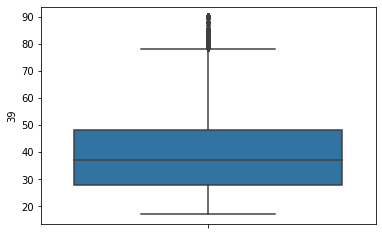

In [90]:
import seaborn as sns
sns.boxplot(y=df['39'])

In [91]:
df = pd.concat([df, y], axis = 1)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,<=50K


In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("39",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='39', column =[i], grid = False)


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)
#it is difficult to say which data point is an outlier

#defining threshold
threshold = 3
print(np.where(z > 3))
print(z)

## **Resampling**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_out.iloc[:,:-1]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Memantine', 'Saline']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [97]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [98]:
print(Counter(y))

Counter({' <=50K': 24719, ' >50K': 7841})


1. Random Over Sampling

In [99]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))


Counter({' <=50K': 24719, ' >50K': 24719})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2. SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(Counter(y_sm))

3. SMOTE Tomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

print(Counter(y_smt))

4. Random Under Sampling

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

5. Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print(Counter(y_tl))

6. Cluster Centroids


In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

In [ ]:
# # instantiating over and under sampler
# over = RandomOverSampler(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.8)

# # first performing oversampling to minority class
# X_over, y_over = over.fit_resample(X, y)
# print(f"Oversampled: {Counter(y_over)}")

# # now to comine under sampling 
# X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
# print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_sm
y = y_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Memantine', 'Saline']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()